<a href="https://colab.research.google.com/github/mariamloukili/Exploratory-Data-Analysis-EDA-Task3-Sparks-Foundation/blob/main/Exploratory_Data_Analysis_(EDA)_Task3_Sparks_Foundation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis - Retail SuperStore**

In this section we will try to find out the weak areas where we can work to make more profit

Steps to be followed :

1. Importing the libraries
2. Loading the dataset
3. Data Preprocessing
4. EDA
5. Data Visualization

#### **Author : Mariam Loukili**
## **Importing the libraries**

In [3]:
# Import the required libarries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

## **Loading the dataset**

In [4]:
dataset = pd.read_csv("SampleSuperstore.csv")
dataset.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Data Preprocessing**

In [5]:
# number of rows and columns
dataset.shape

(9994, 13)

In [6]:
# Get the features name
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# Get informations about the data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# get description of each numerical data 
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Checking for null values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# Checking for duplicate values
dataset.duplicated().sum()

17

In [11]:
# Dropping the duplicates
dataset.drop_duplicates(inplace= True)
dataset.shape

(9977, 13)

In [12]:
# Removing the unnecessary columns such as postal code
dataset.drop(columns = ['Postal Code'],axis=1 , inplace=True)


In [13]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **EDA : Exploratory Data Analysis**

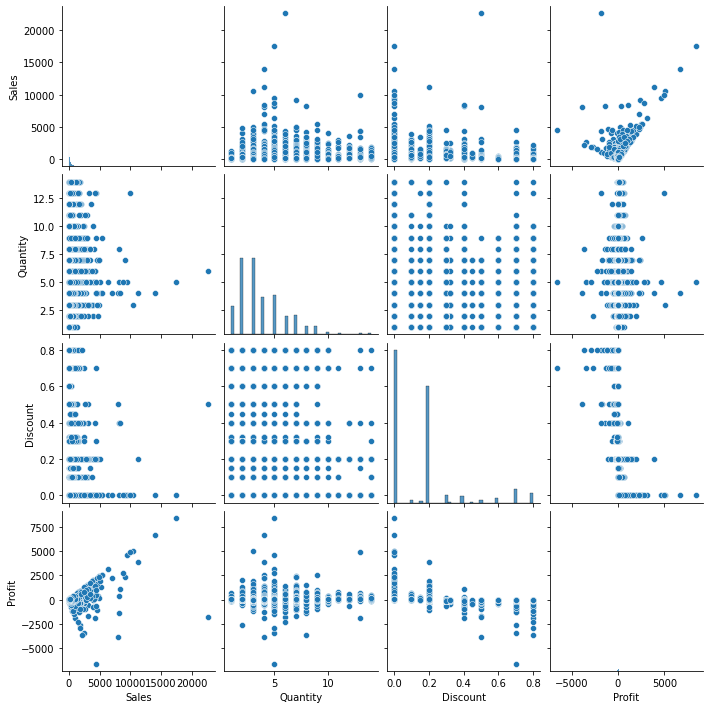

In [14]:
# Visualizing the dataset as a whole using the pair plot
import seaborn as sns 
sns.pairplot(dataset)

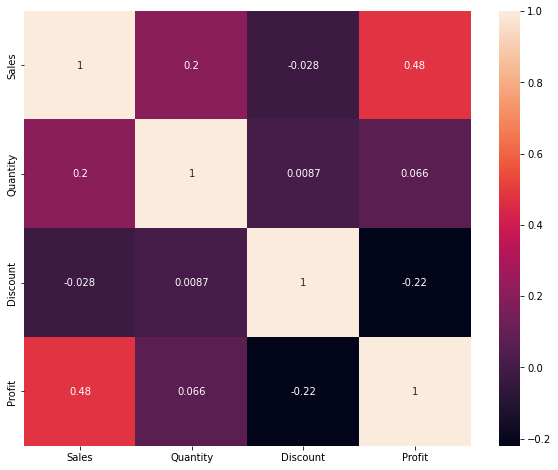

In [15]:
# finding the pairwise correlations between the columns and visualising using heatmaps
dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

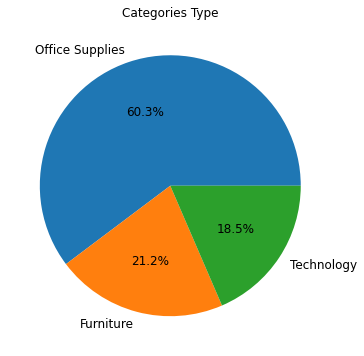

In [16]:
# Visualising the categories
plt.figure(figsize = (6,6))
textprops = {"fontsize":20}
plt.title('Categories Type')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%.1f%%', textprops={'fontsize': 12})
plt.show()

<Figure size 720x1152 with 0 Axes>

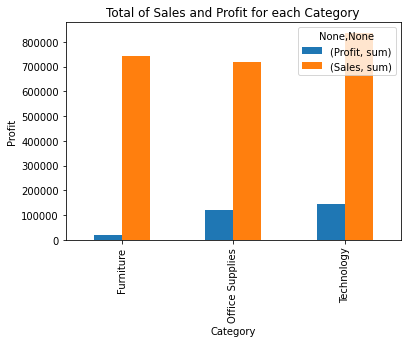

In [33]:
plt.figure(figsize= (10,16))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total of Sales and Profit for each Category')
plt.ylabel('Profit')
plt.show()

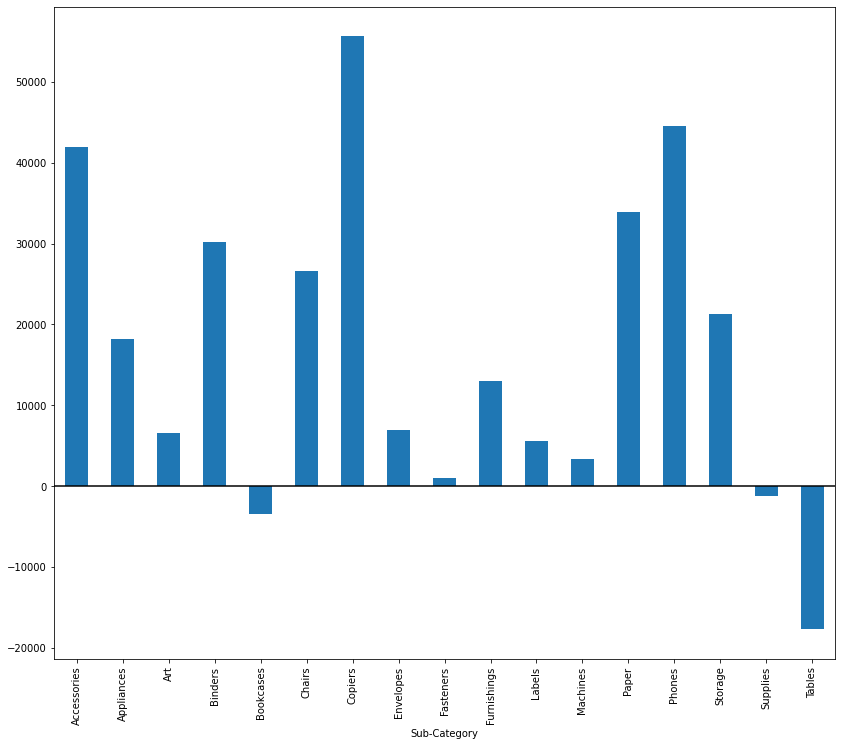

In [35]:
plt.figure(figsize=(14,12))
dataset.groupby('Sub-Category')['Profit'].sum().plot.bar()
plt.axhline(0, color='k')

##### **The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit**

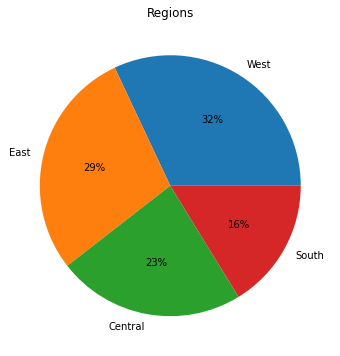

In [98]:
plt.figure(figsize = (6,6))
plt.title('Regions')
plt.pie( dataset['Region'].value_counts() , labels  = dataset['Region'].value_counts().index , autopct='%.0f%%')
plt.show()

**The graph shows that West and East have same Profit though sales in the East are less as compared to West.**

<Figure size 720x1152 with 0 Axes>

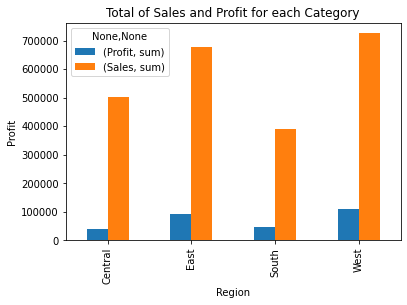

In [99]:
plt.figure(figsize= (10,16))
dataset.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total of Sales and Profit for each Region')
plt.ylabel('Profit')
plt.show()

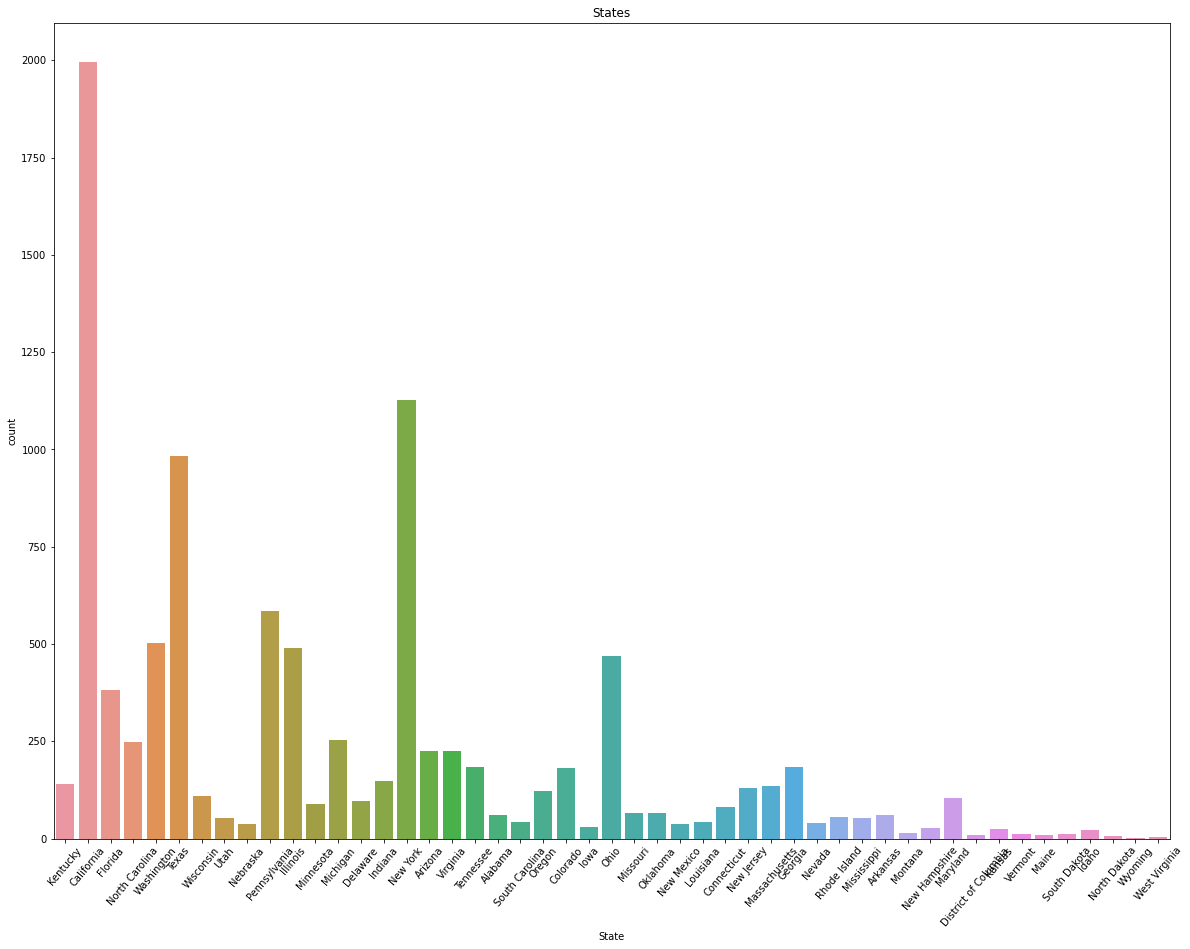

In [100]:
plt.figure(figsize=(20,15))
sns.countplot(x=dataset['State'])
plt.xticks(rotation=50)
plt.title('States')
plt.show()

In [115]:
dataset.groupby("State").Profit.sum().nlargest(n=10)

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

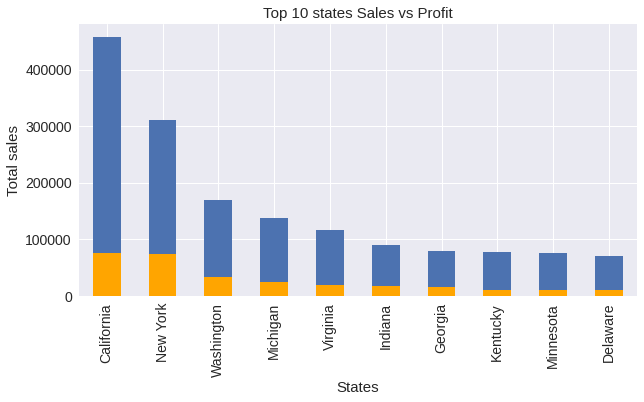

In [128]:
# computing top states in terms of sales from first 10 observations
top_states_s = dataset.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = dataset.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'orange')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

## **Conclusion :**
The weak areas where we can work to make more profit are :

1. We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
2. Considering the sub-categories sales of tables should be minimized.
3. Increase sales more in the east as profit is more.
4. We should concentrate on the states like 'New York' and 'California' to make more profits.